In [1]:
import os

from typing import Dict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import add_path

add_path()

import model
from model.utils import common_params
from model import EV, PHEV, CV

In [2]:
plt.style.use("dark_background")
plt.rc("grid", alpha=0.3)

In [3]:
# lines = []
cp = model.utils.common_params.copy()

In [4]:
class Society_car_prices(model.SocietyConstantsEnergyPrices):
    def _set_unique_initial(self, **kwargs):
        self.lines = []
        return model.SocietyConstantsEnergyPrices._set_unique_initial(self, **kwargs)

    def _run(self, current_year: int, current_month: int) -> None:
        self.lines.append({c_type: self.government.get_subsidy_val(c_type) for c_type in [EV, PHEV, CV]})
        return super()._run(current_year, current_month)

In [5]:
MC = 100
T = cp["T"]
cp["kwargs"]["car_price_noise"] = lambda: 0

In [6]:
cp

{'T': 300,
 'kwargs': {'alpha': 0.01,
  'car_price_noise': <function __main__.<lambda>()>,
  'city_size': (17, 17),
  'corporation_margin': 0.2,
  'corporation_technological_progress': 0.004,
  'energy_price': 500,
  'energy_factor': 0.8,
  'fuel_price': 6,
  'government': <model.Government.GovernmentBuildChargingStation at 0x7fb849f602d0>,
  'initial_public_chargers': 1,
  'initial_time': (2015, 1),
  'nerby_radius': 1,
  'population': 3000}}

In [7]:
soc = Society_car_prices(**cp["kwargs"])
soc.run(T)

In [8]:
max([line[EV] for line in soc.lines])

0

<Axes: >

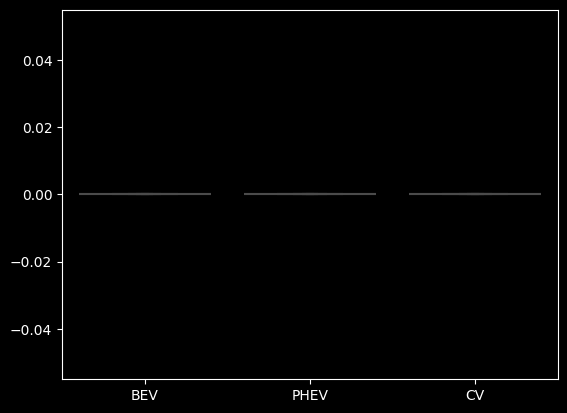

In [9]:
sns.boxenplot(pd.DataFrame(soc.lines))

In [10]:
soc.corporations.car_costs

{'CV': 105750.0, 'BEV': 140337.05, 'PHEV': 123043.52}